# Corr + Activation + Pooling

**Convolutional Layer**<br/>
Normalizaiton -> Convolution -> Activation(Sigmoid) -> Max Pooling

Normalization(min,Max)<br/>
이미지는 0~255로 이루어져있어서 사실상 min은 0값<br/>
(x-m)/(M-m)

## 미리 구현

HxW of the image = 417 X 710

meta data: {'Max': 254.97449999999998, 'min': 1.368}

shape after padding: 419/712 

shape after convolution: 417/710 

shape after pooling: 417/710 


Text(0.5, 1.0, 'After Max Pooling')

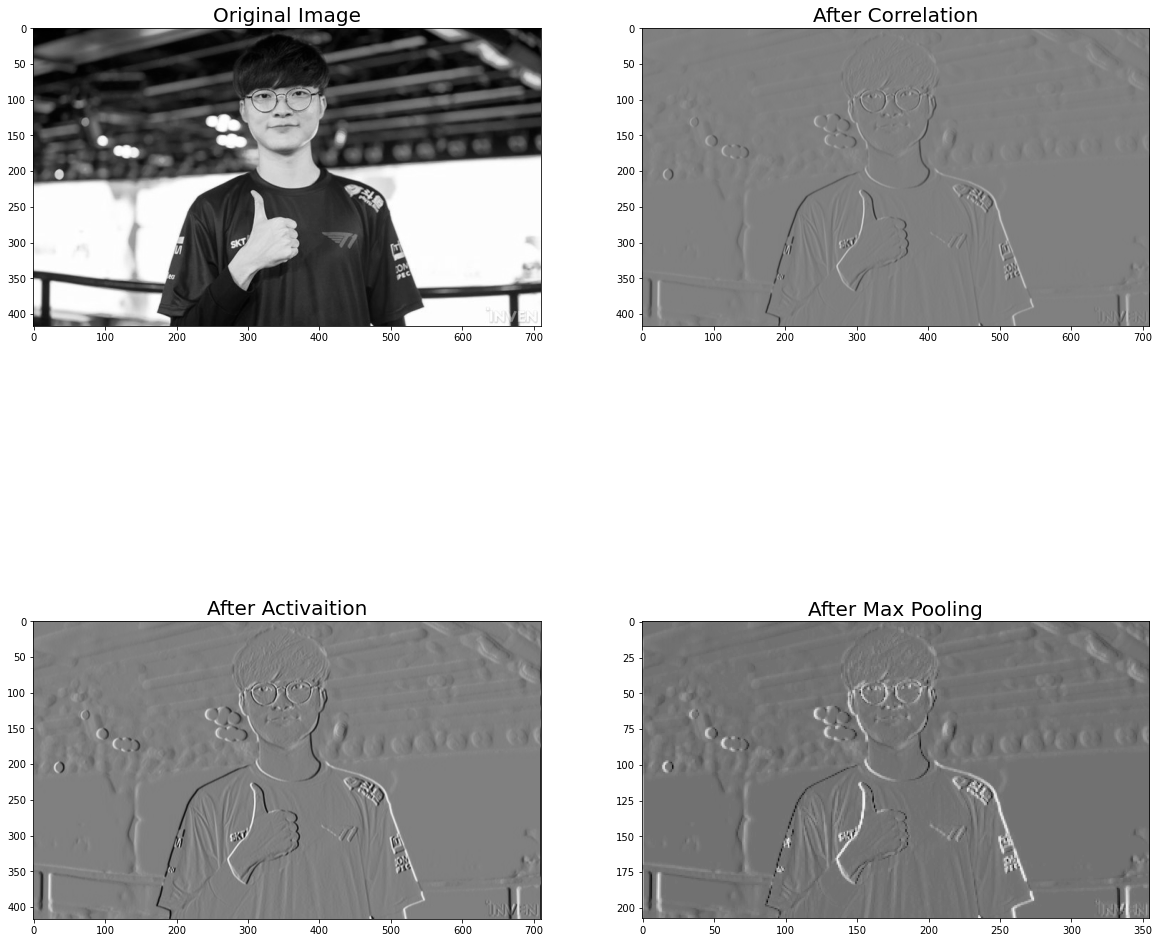

In [25]:
import matplotlib.pyplot as plt
import math

# set parameters
pad = 1
strides = 2
pool_size = 2

sobel_x = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
corr_filter = sobel_x
filter_size = len(corr_filter)

# set 2x2 axes
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# function to transform the image
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

# read the test image
img = plt.imread('./faker.jpg')
img = rgb2gray(img)
img = img.tolist()

# draw the original image
axes[0,0].imshow(img,'gray')
axes[0,0].set_title("Original Image", fontsize=20)

# normalize the image
H, W = len(img), len(img[0])
print(f"HxW of the image = {H} X {W}\n")

meta_data = dict()
data_len = H*W

data_sum = 0
data_Max = img[0][0]
data_min = img[0][0]

for img_row in img:
    for img_val in img_row:
        if data_Max < img_val:
            data_Max = img_val
        if data_min > img_val:
            data_min = img_val
                
meta_data['Max'] = data_Max
meta_data['min'] = data_min
print(f"meta data: {meta_data}\n")

data = list()
for img_row in img:
    data_vec = list()
    for img_val in img_row:
        data_vec.append((img_val - meta_data['min'])/(meta_data['Max'] - meta_data['min']))
    data.append(data_vec)

# zero-padding
padded_data = list()

for _ in range(pad):
    padded_data.append([0]*(W+pad*2))
for row in data:
    padded_data.append([0]*pad + row + [0]*pad)
for _ in range(pad):
    padded_data.append([0]*(W+pad*2))
data = padded_data

H, W = len(data), len(data[0])
print("shape after padding: {}/{} \n".format(H, W))

# correlation
corr = list()
valid_H ,valid_W = H - filter_size + 1,  W - filter_size + 1

for h in range(valid_H):
    corr_vec = list()
    for w in range(valid_W):
        window = list()
        for inner_h in range(filter_size):
            window.append(data[h+inner_h][w:w+filter_size])
            
        corr_sum = 0
        for window_row , filter_row in zip(window, corr_filter):
            for w , co in zip(window_row, filter_row):
                corr_sum += w*co
        corr_vec.append(corr_sum)
    corr.append(corr_vec)
    
# draw the image after correlation  at 0x1
img = corr
axes[0,1].imshow(img, 'gray')
axes[0,1].set_title('After Correlation', fontsize=20)            

H, W = len(img), len(img[0])
print("shape after convolution: {}/{} \n".format(H, W))

# activation value of the image _sigmoid
data_act = list()

for h in range(H):
    data_vec = list()
    for w in range(W):
        data_vec.append(1 / (1 + math.exp(-img[h][w])))
    data_act.append(data_vec)
    
# draw the image after activation function at 1x0
img = data_act
axes[1,0].imshow(img,'gray')
axes[1,0].set_title('After Activaition', fontsize=20)

# max pooling to the image
valid_H , valid_W = H - pool_size + 1 , W - pool_size + 1
pooled = list()

for h in range(0, valid_H, strides):
    pool_vec = list()
    for w in range(0, valid_W, strides):
        window = list()
        for inner_h in range(pool_size):
            window.append(img[h+inner_h][w:w+pool_size])
            
        M = window[0][0]
        for window_row in window:
            for window_val in window_row:
                if M < window_val:
                    M = window_val
        pool_vec.append(M)
    pooled.append(pool_vec)
H, W = len(img), len(img[0])
print("shape after pooling: {}/{} ".format(H, W))

# draw the image after max pooling
img = pooled
axes[1,1].imshow(img,'gray')
axes[1,1].set_title('After Max Pooling', fontsize=20)

## 복습 구현

shape of original image: 417/710 
shape of padding image: 419/712 
shape of correlation image: 417/710
shape of activation image: 417/710
shape of Max pooling image: 208/355


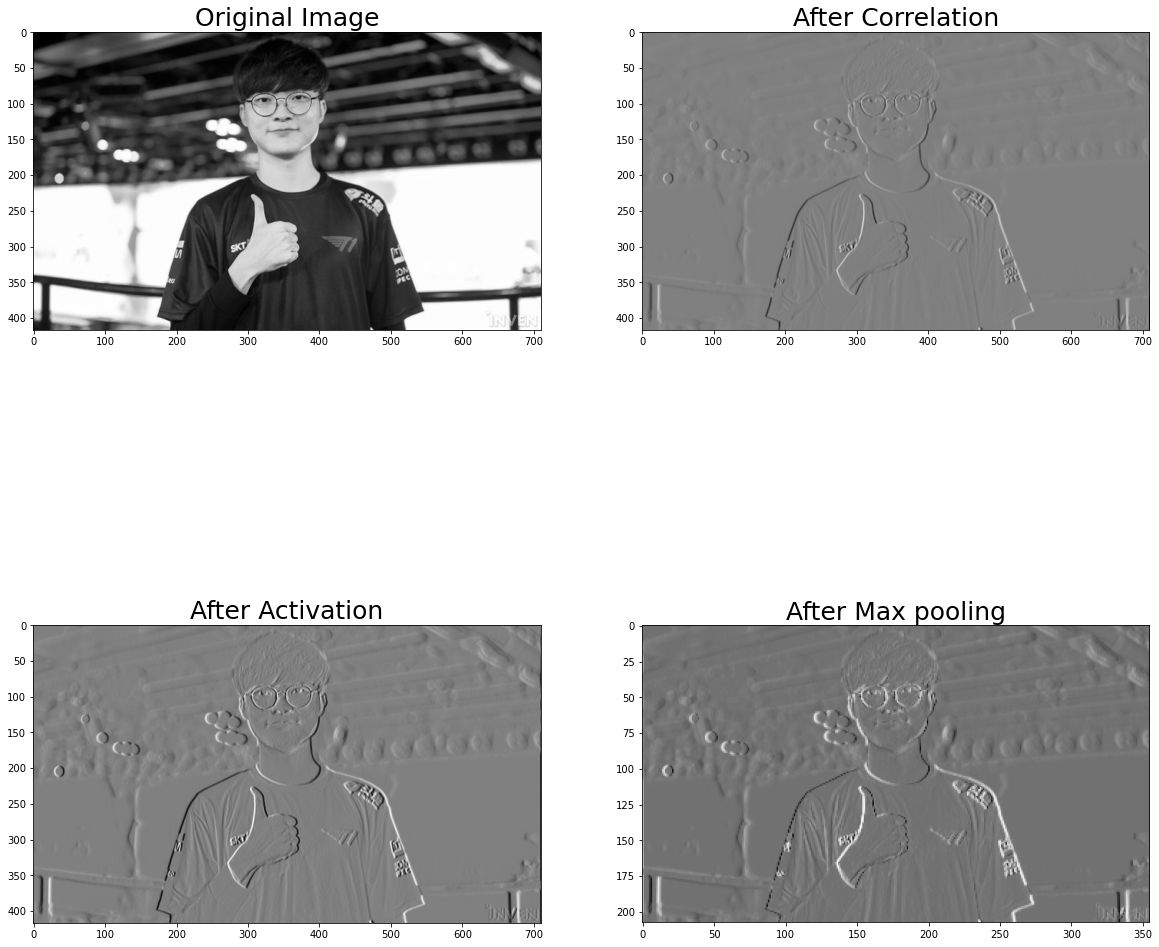

In [33]:
import matplotlib.pyplot as plt
import math

# set parameters
pad = 1
strides = 2
pool_size = 2

sobel_x = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
corr_filter = sobel_x
filter_size = len(corr_filter)

# set 2x2 axes
fig, axes = plt.subplots(2, 2, figsize=(20,20))

# function to transform the image
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

# read the test image
img = plt.imread('./faker.jpg')
img = rgb2gray(img)
img = img.tolist()

# draw the original image
axes[0,0].imshow(img, 'gray')
axes[0,0].set_title("Original Image", fontsize=25)

H, W = len(img), len(img[0])
print("shape of original image: {}/{} ".format(H, W))

# normalize_minMax
for h in range(H):
    for w in range(W):
        img[h][w] /= 255.

# zero-padding
padded_img = list()
for _ in range(pad):
    padded_img.append([0]*(W+2*pad))
for idx in range(H):
    padded_img.append([0]*pad + img[idx] + [0]*pad)
for _ in range(pad):
    padded_img.append([0]*(W+2*pad))
img = padded_img
H, W = len(img), len(img[0])
print("shape of padding image: {}/{} ".format(H, W))
    
# 2D correlation
corr_mat = list()
valid_H , valid_W = H - filter_size + 1, W - filter_size + 1

for h in range(valid_H):
    corr_vec = list()
    for w in range(valid_W):
        window = list()
        for inner_h in range(filter_size):
            window.append(img[h+inner_h][w:w+filter_size])
        
        corr_sum = 0
        for window_row, filter_row in zip(window, corr_filter):
            for window_val, filter_val in zip(window_row, filter_row):
                corr_sum += window_val * filter_val
        corr_vec.append(corr_sum)
    corr_mat.append(corr_vec)

# draw the image after correlation  at 0x1
img = corr_mat
axes[0,1].imshow(img,'gray')
axes[0,1].set_title("After Correlation", fontsize =25)

H, W = len(img), len(img[0])
print(f"shape of correlation image: {H}/{W}")

# activation value of the image
img_act = list()

for img_row in img:
    img_vec=list()
    for img_val in img_row:
        img_vec.append(1 / (1 + math.exp(-img_val)))
    img_act.append(img_vec)
    
# draw the image after activation  at 1x0
img = img_act
axes[1,0].imshow(img,'gray')
axes[1,0].set_title("After Activation", fontsize =25)

H, W = len(img), len(img[0])
print(f"shape of activation image: {H}/{W}")

# max pooling to the image
valid_H, valid_W = H - pool_size + 1, W - pool_size + 1
img_pooled = list()

for h in range(0, valid_H, strides):
    img_pooled_vec = list()
    for w in range(0, valid_W, strides):
        window = list()
        for inner_h in range(pool_size):
            window.append(img[h+inner_h][w:w+pool_size])
        
        M = window[0][0]
        for window_row in window:
            for window_val in window_row:
                if M < window_val:
                    M = window_val
        img_pooled_vec.append(M)
    img_pooled.append(img_pooled_vec)

#draw the image after Max pooling  at 1x1
img = img_pooled
axes[1,1].imshow(img,'gray')
axes[1,1].set_title("After Max pooling", fontsize =25)

H, W = len(img), len(img[0])
print(f"shape of Max pooling image: {H}/{W}")     